In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

num_classes = 10
input_shape = x_train.shape[1:]

inputs = Input(shape=input_shape)

x = inputs
for _ in range(4):  # 4 blocks
    for _ in range(3):  # 3 Conv2D → relu → BN
        x = Conv2D(64, (3, 3), padding='same', strides=1)(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_24 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_25 (Activation)  (None, 32, 32, 64)        0         
                                                           

Epoch 1/10
782/782 [==============================] - 29s 29ms/step - loss: 1.7898 - accuracy: 0.3386 - val_loss: 1.7513 - val_accuracy: 0.3824
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 1.3207 - accuracy: 0.5239 - val_loss: 1.5834 - val_accuracy: 0.5367
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 1.0494 - accuracy: 0.6356 - val_loss: 1.3525 - val_accuracy: 0.5718
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.9023 - accuracy: 0.6956 - val_loss: 0.9741 - val_accuracy: 0.6753
Epoch 5/10
782/782 [==============================] - 23s 29ms/step - loss: 0.7954 - accuracy: 0.7363 - val_loss: 1.2055 - val_accuracy: 0.6321
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.7325 - accuracy: 0.7573 - val_loss: 0.8967 - val_accuracy: 0.7028
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.6829 - accuracy: 0.7744 - val_loss: 0.8652 - val_accuracy:

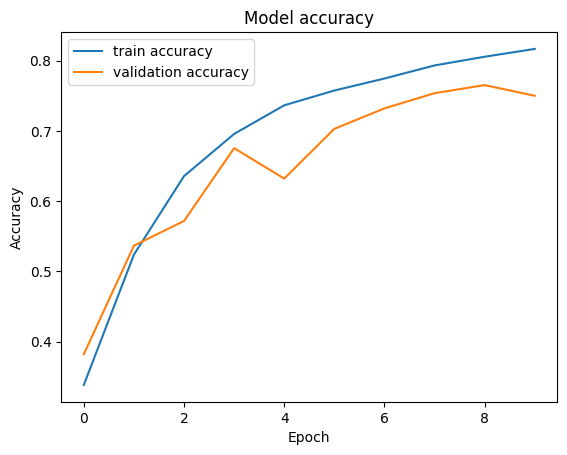

In [8]:

import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")



plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

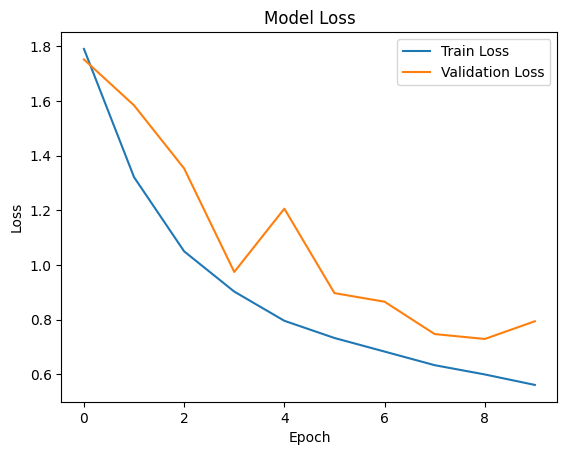

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()